In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

## 6.2.6 - Get City Weather Data¶

### Import Dependencies, and Initialize an Empty List and Counters

In [11]:
# Import Dependencies datetime module from datetime library
from datetime import datetime

# Create an empty list to hold the weather data

city_data = []

# print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04adbef39455200ca16d18e7aeb02de8


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

### Handle API Request Errors with try-except Blocks

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | nikolskoye
Processing Record 2 of Set 13 | busselton
Processing Record 3 of Set 13 | khani
Processing Record 4 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 13 | airai
Processing Record 6 of Set 13 | cape town
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | chuy
Processing Record 9 of Set 13 | east london
Processing Record 10 of Set 13 | georgetown
Processing Record 11 of Set 13 | torbay
Processing Record 12 of Set 13 | wuwei
Processing Record 13 of Set 13 | vaini
Processing Record 14 of Set 13 | daan
Processing Record 15 of Set 13 | avarua
Processing Record 16 of Set 13 | rikitea
Processing Record 17 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 13 | khatanga
Processing Record 19 of Set 13 | katsuura
Processing Record 20 of Set 13 | bluff
Processing Record 21 of Set 13 | dali
Processing Record 22 of Set 13 | sangar
Processing Record 23 of Set 13 | amderma
City not 

Processing Record 36 of Set 16 | luwuk
Processing Record 37 of Set 16 | veraval
Processing Record 38 of Set 16 | paita
Processing Record 39 of Set 16 | bredasdorp
Processing Record 40 of Set 16 | cabo san lucas
Processing Record 41 of Set 16 | mehamn
Processing Record 42 of Set 16 | gouyave
Processing Record 43 of Set 16 | santa lucia
Processing Record 44 of Set 16 | saint anthony
Processing Record 45 of Set 16 | contamana
Processing Record 46 of Set 16 | rosarito
Processing Record 47 of Set 16 | svetlogorsk
Processing Record 48 of Set 16 | pemba
Processing Record 49 of Set 16 | sibu
Processing Record 50 of Set 16 | nouadhibou
Processing Record 1 of Set 17 | omsukchan
Processing Record 2 of Set 17 | caravelas
Processing Record 3 of Set 17 | talcahuano
Processing Record 4 of Set 17 | shache
Processing Record 5 of Set 17 | champasak
Processing Record 6 of Set 17 | talnakh
Processing Record 7 of Set 17 | san patricio
Processing Record 8 of Set 17 | portland
Processing Record 9 of Set 17 |

Processing Record 19 of Set 20 | kavieng
Processing Record 20 of Set 20 | rodionovo-nesvetayskaya
Processing Record 21 of Set 20 | manokwari
Processing Record 22 of Set 20 | lahij
Processing Record 23 of Set 20 | port macquarie
Processing Record 24 of Set 20 | vaitape
Processing Record 25 of Set 20 | saint-ambroise
Processing Record 26 of Set 20 | spas
Processing Record 27 of Set 20 | moose factory
Processing Record 28 of Set 20 | esna
Processing Record 29 of Set 20 | nantucket
Processing Record 30 of Set 20 | tubmanburg
Processing Record 31 of Set 20 | pimentel
Processing Record 32 of Set 20 | aklavik
Processing Record 33 of Set 20 | asosa
Processing Record 34 of Set 20 | aybak
City not found. Skipping...
Processing Record 35 of Set 20 | tevriz
Processing Record 36 of Set 20 | itarema
Processing Record 37 of Set 20 | arman
Processing Record 38 of Set 20 | cayenne
Processing Record 39 of Set 20 | brookhaven
Processing Record 40 of Set 20 | rognan
Processing Record 41 of Set 20 | guangy

City not found. Skipping...
Processing Record 7 of Set 24 | baykit
Processing Record 8 of Set 24 | davila
Processing Record 9 of Set 24 | haines junction
Processing Record 10 of Set 24 | tazovskiy
Processing Record 11 of Set 24 | katherine
Processing Record 12 of Set 24 | primorsko-akhtarsk
Processing Record 13 of Set 24 | filingue
Processing Record 14 of Set 24 | gurgentepe
Processing Record 15 of Set 24 | dudinka
Processing Record 16 of Set 24 | koslan
Processing Record 17 of Set 24 | solano
Processing Record 18 of Set 24 | dzerzhinskoye
Processing Record 19 of Set 24 | obera
Processing Record 20 of Set 24 | dawson creek
Processing Record 21 of Set 24 | morondava
Processing Record 22 of Set 24 | panara
Processing Record 23 of Set 24 | kruisfontein
Processing Record 24 of Set 24 | tsaratanana
Processing Record 25 of Set 24 | chokurdakh
Processing Record 26 of Set 24 | sijunjung
Processing Record 27 of Set 24 | along
Processing Record 28 of Set 24 | fallon
Processing Record 29 of Set 2

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,50.00,93,90,4.27,RU,2020-10-29 21:46:25
1,Busselton,-33.65,115.33,57.00,47,1,12.24,AU,2020-10-29 21:46:03
2,Khani,41.96,42.96,59.00,93,0,3.36,GE,2020-10-29 21:48:00
3,Airai,-8.93,125.41,62.51,90,70,1.57,TL,2020-10-29 21:46:09
4,Cape Town,-33.93,18.42,53.01,71,20,4.70,ZA,2020-10-29 21:41:52
5,Ushuaia,-54.80,-68.30,46.40,70,40,34.45,AR,2020-10-29 21:46:02
6,Chuy,-33.70,-53.46,54.14,75,12,11.61,UY,2020-10-29 21:47:05
7,East London,-33.02,27.91,63.16,80,100,19.77,ZA,2020-10-29 21:45:56
8,Georgetown,5.41,100.34,78.80,88,20,4.34,MY,2020-10-29 21:46:26
9,Torbay,47.67,-52.73,39.99,85,97,1.99,CA,2020-10-29 21:46:35


In [17]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [18]:
# Reorder DataFrame Columns
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-10-29 21:46:25,59.70,30.79,50.00,93,90,4.27
1,Busselton,AU,2020-10-29 21:46:03,-33.65,115.33,57.00,47,1,12.24
2,Khani,GE,2020-10-29 21:48:00,41.96,42.96,59.00,93,0,3.36
3,Airai,TL,2020-10-29 21:46:09,-8.93,125.41,62.51,90,70,1.57
4,Cape Town,ZA,2020-10-29 21:41:52,-33.93,18.42,53.01,71,20,4.70
5,Ushuaia,AR,2020-10-29 21:46:02,-54.80,-68.30,46.40,70,40,34.45
6,Chuy,UY,2020-10-29 21:47:05,-33.70,-53.46,54.14,75,12,11.61
7,East London,ZA,2020-10-29 21:45:56,-33.02,27.91,63.16,80,100,19.77
8,Georgetown,MY,2020-10-29 21:46:26,5.41,100.34,78.80,88,20,4.34
9,Torbay,CA,2020-10-29 21:46:35,47.67,-52.73,39.99,85,97,1.99


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604008288.576854

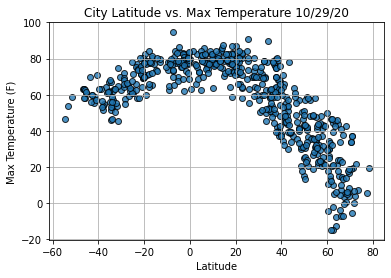

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

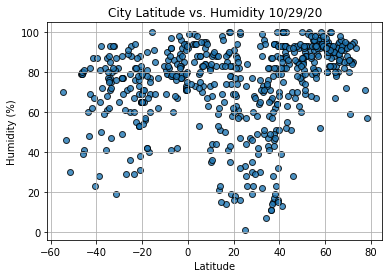

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

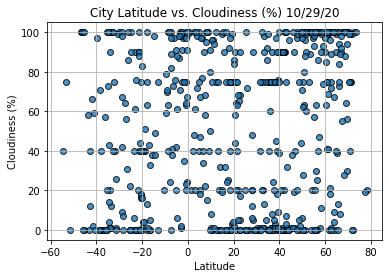

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

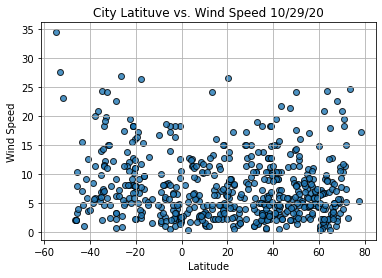

In [26]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latituve vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()